In [1]:
import os

In [2]:
imdb_dir = r'''C:\Users\sagar\Downloads\aclImdb\aclImdb'''
train_dir = os.path.join(imdb_dir, 'test')

In [3]:
labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='Latin-1')
            f_temp = f.read()
            texts.append(f_temp)
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [4]:
## Tokenizing the data

# tokenizing the text of the raw IMDB data

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np


maxlen = 100                  # cuts off review after 100 words
training_samples = 200         # trains on 200 samples
validation_samples = 10000     # validates on 10000 samples
max_words = 10000              # considers only the top 10000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index

print('Found %s unique tokens'%len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)

print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)


Using TensorFlow backend.
c:\users\sagar\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\sagar\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\sagar\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16

Found 72637 unique tokens
Shape of data tensor: (17243, 100)
Shape of label tensor: (17243,)


In [5]:
# splits the data into training and validation set, but first shuffles the data. because the data is ordered ('neg' first)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples:training_samples+validation_samples]
y_val = labels[training_samples:training_samples+validation_samples]

In [8]:
## Downloading the glove word embeddings
# go to 'https://nlp.stanford.edu/projects/glove' and download pre-computed embeddings

array([[6672,  128,  476, ...,  352,    4,   58],
       [ 345,    4,    1, ...,   88,   25,   89],
       [   1, 3515,    4, ...,  355,    1, 2266],
       ...,
       [   6,    6,  682, ...,   14,   68,   25],
       [  98,  861,  596, ...,  713,  722,   57],
       [1262,    3,    9, ...,  132,  207,  304]])

In [6]:
## Preprocessing the embeddings
# parsing the GloVe word-embeddings file

glove_dir = r'''C:\Users\sagar\Downloads\glove.6B'''

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding='Latin-1')
for line in f:
    values = line.split()
    word = values[0]
    try:
        coefs = np.asarray(values[1:], dtype='float32')
    except ValueError:
        break
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' %len(embeddings_index))

Found 37608 word vectors.


In [24]:
word_index

{'the': 1,
 'a': 2,
 'and': 3,
 'of': 4,
 'to': 5,
 'br': 6,
 'is': 7,
 'in': 8,
 'i': 9,
 'it': 10,
 'this': 11,
 'that': 12,
 'was': 13,
 'movie': 14,
 'for': 15,
 'as': 16,
 'with': 17,
 'but': 18,
 'film': 19,
 'on': 20,
 'not': 21,
 'you': 22,
 'have': 23,
 'are': 24,
 'be': 25,
 'one': 26,
 'his': 27,
 'he': 28,
 'at': 29,
 'all': 30,
 'they': 31,
 'so': 32,
 'by': 33,
 'like': 34,
 'an': 35,
 'from': 36,
 'who': 37,
 'or': 38,
 'just': 39,
 'if': 40,
 'out': 41,
 'about': 42,
 "it's": 43,
 'there': 44,
 'her': 45,
 'some': 46,
 'has': 47,
 'what': 48,
 'good': 49,
 'no': 50,
 'when': 51,
 'more': 52,
 'even': 53,
 'up': 54,
 'would': 55,
 'very': 56,
 'only': 57,
 'time': 58,
 'my': 59,
 'really': 60,
 'she': 61,
 'bad': 62,
 'which': 63,
 'had': 64,
 'see': 65,
 'me': 66,
 'their': 67,
 'can': 68,
 'were': 69,
 'story': 70,
 'much': 71,
 'than': 72,
 'do': 73,
 'well': 74,
 'get': 75,
 'been': 76,
 'we': 77,
 "don't": 78,
 'because': 79,
 'other': 80,
 'how': 81,
 'into': 82,
 

In [7]:
## Preparing the GloVe word-embeddings matrix

embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i<max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector  ## words not found in the embedding index will all be zeros

In [9]:
## Defining a model

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [10]:
## Loading the GLoVE embeddings into the model

# load the GLoVE matrix into the embedding layer
model.layers[0].set_weights([embedding_matrix])

# freezing the Embedding layer
model.layers[0].trainable = False

W0814 09:11:39.124062  8712 deprecation_wrapper.py:119] From c:\users\sagar\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0814 09:11:39.125060  8712 deprecation_wrapper.py:119] From c:\users\sagar\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.



In [11]:
## Training and evaluating the model

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

model.save_weights('pre_trained_glove_model.h5')

W0814 09:14:42.900914  8712 deprecation_wrapper.py:119] From c:\users\sagar\appdata\local\programs\python\python37\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0814 09:14:42.931372  8712 deprecation.py:323] From c:\users\sagar\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 7ms/step - loss: 2.8658 - acc: 0.6300 - val_loss: 0.6840 - val_acc: 0.5442
Epoch 2/10
200/200 [==============================] - 0s 2ms/step - loss: 0.6219 - acc: 0.6950 - val_loss: 0.5917 - val_acc: 0.7254
Epoch 3/10
200/200 [==============================] - 0s 2ms/step - loss: 0.5156 - acc: 0.7000 - val_loss: 0.7273 - val_acc: 0.7254
Epoch 4/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4422 - acc: 0.7650 - val_loss: 0.6305 - val_acc: 0.6962
Epoch 5/10
200/200 [==============================] - 1s 3ms/step - loss: 0.4651 - acc: 0.7950 - val_loss: 0.5834 - val_acc: 0.7256
Epoch 6/10
200/200 [==============================] - 0s 2ms/step - loss: 0.2971 - acc: 0.7950 - val_loss: 0.5971 - val_acc: 0.7262
Epoch 7/10
200/200 [==============================] - 0s 2ms/step - loss: 0.2885 - acc: 0.8300 - val_loss: 0.5852 - val_acc: 0.7261
Epoch 8/10
200/200 [========

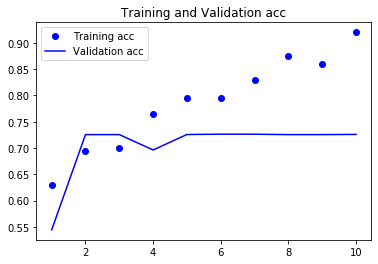

In [18]:
## Plotting the results

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation acc')
plt.legend()

plt.show()

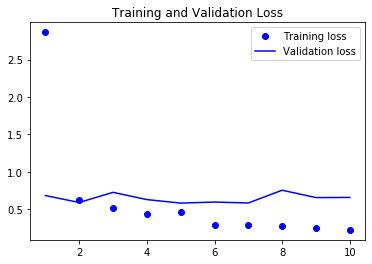

In [19]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()